# Input und Output Teil 2

Willkommen zurück! Auch in diesem Notebook geht es um Input und Output. Zunächst lernst Du, wie Du bei Python mit tabellarischen Dateien arbeiten kannst. Anschließend erfährst Du, wie sich mittels User:innen-Input der Ablauf eines laufenden Programms kontrollieren lässt. Abschließend gehen wir detailliert auf die ```print```-Funktion ein. Wie versprochen erwartet Dich wieder ein Anwendungsfall - das Programmieren des Gedankenprotokollanten. Viel Erfolg!


## Tabellarische Dateien

Tabellarische Dateien kennst Du von Microsoft Excel (oder vergleichbaren Programmen). An der Benutzeroberfläche sind sie in Spalten und Zeilen organisiert, wie wir hier am Beispiel einer Tabelle über die [zehn flächengrößten Gemeinden Deutschlands](https://de.wikipedia.org/wiki/Liste_der_flächengrößten_Gemeinden_Deutschlands) sehen:

<img src="../3_Dateien/Grafiken_und_Videos/Flächengrösste_Gemeinden_Tabelle.png">

Der einzige strukturelle Unterschied zu Textdateien ist, dass es neben Zeilen auch eine zweite Strukturdimension gibt, nämlich die Spalten. 

"Hinter den Kulissen" werden die einzelnen Spalten durch ein Trennzeichen (verwirrenderweise teils *separator*, teils *delimiter* auf Englisch) strukturiert. Bei dieser Datei sind dies Semikola (Strichpunkte), wie wir hier sehen:

<img src="../3_Dateien/Grafiken_und_Videos/Flächengrösste_Gemeinden_roh.png">

Die Zeilen wiederum werden wie bei Textdateien durch Zeilenumbrüche strukturiert, wobei die dafür zuständigen Zeichen im Screenshot oben einmal mehr nicht sichtbar sind.

Wenn wir tabellarische Dateien einlesen, müssen wir wissen, mithilfe welchen Trennzeichens sie auf der Spaltenebene strukturiert sind, damit die Daten einer Zeile an den richtigen Orten in Spalten unterteilt werden. Neben Semikola (```";"```) sind Kommata (```","```) oder Tabs (```"\t"```) übliche Trennzeichen. Wenn, wie oben, Semikola das Trennzeichen sind, können die anderen üblichen Trennzeichen ohne Weiteres zwischen den Semikola vorkommen (siehe z.&nbsp;B. die Kommata in den Flächenangaben). Auch beim Schreiben von tabellarischen Dateien müssen bzw. können wir spezifizieren, welches Trennzeichen verwendet werden soll.

Zur Arbeit mit tabellarischen Daten (sowie generell für fortgeschrittene Datenanalyse) gibt es die Bibliothek ```pandas```, der das zweiteilige Notebook "Datenanalyse" gewidmet ist. Hier schauen wir uns das ```csv```-Modul an, das sich für den einfachen Umgang mit tabellarischen Daten eignet.

### Das ```csv```-Modul

Wie üblich importieren wir das ```csv```-Modul zu Beginn. Ebenfalls setzen wir stets ```csv.``` vor den Namen von Funktionen aus diesem Modul (vgl. oben zum ```os```-Modul).

Die Datei mit den flächengrößten Gemeinden lesen wir natürlich auch mittels ```open```, eingebettet in ein ```with```-Statement, ein. Das ```read_file``` übergeben wir zusammen mit dem korrekten Trennzeichen (```delimiter=";"```) der ```reader```-Funktion (beachte die "agentive" Benennung von Funktionen im ```csv```-Modul). Standardtrennzeichen ist übrigens das Komma (der Name des Moduls ist nämlich eine Abkürzung für *comma-separated values*), das wie immer nicht angegeben werden muss. 

Die ```reader```-Funktion gibt uns nun nicht ein gewöhnliches Python-Objekt zurück (etwa einen string oder eine Liste wie beim Textinput), sondern ein ```_csv.reader object```, das wir mit ```data``` referenzieren. Über dieses ```_csv.reader object``` können wir wie gewohnt iterieren und die einzelnen Zeilen einer Liste anhängen. Wir müssen das innerhalb der Einrückung machen, da  das ```_csv.reader object``` zusammen mit ```read_file``` wieder geschlossen wird, sobald wir die Einrückung verlassen:

In [1]:
import csv

with open("../3_Dateien/Tabellarische_Daten/Liste_der_flächengrössten_Gemeinden_Deutschlands.csv", encoding="utf-8") as read_file:
    
    data = csv.reader(read_file, delimiter=";")
    biggest_municipalities = []
    
    for row in data:
        biggest_municipalities.append(row)

for i in range(6):
    print(biggest_municipalities[i])

['Rang', 'Fläche in km²', 'Gemeinde', 'Status/Kreiszugehörigkeit', 'Land']
['1', '891,12', 'Berlin', 'Kreisfreie Stadt', 'Berlin']
['2', '755,09', 'Hamburg', 'Kreisfreie Stadt', 'Hamburg']
['3', '632,55', 'Gardelegen', 'Stadt im Altmarkkreis Salzwedel', 'Sachsen-Anhalt']
['4', '523,95', 'Möckern', 'Stadt im Landkreis Jerichower Land', 'Sachsen-Anhalt']
['5', '468,03', 'Zerbst/Anhalt', 'Stadt im Landkreis Anhalt-Bitterfeld', 'Sachsen-Anhalt']


***

✏️ **Übung 1:** Find heraus, wie viele der 100 flächengrößten Gemeinden zu jedem der 16 Bundesländer gehören. Du kannst direkt mit ```biggest_municipalities``` weiterarbeiten. Dir steht ein dictionary mit Bundesländern zur Verfügung. Ziel ist es, den Wert (jetzt noch null für alle Bundesländer) für jedes Bundesland korrekt zu berechnen.

In [2]:
#In diese Zelle kannst Du den Code zur Übung schreiben.

federal_states = {'Baden-Württemberg': 0, 'Bayern': 0, 'Berlin': 0, 'Brandenburg': 0, 'Bremen': 0, 'Hamburg': 0, 'Hessen': 0, 
                'Mecklenburg-Vorpommern': 0, 'Niedersachsen': 0, 'Nordrhein-Westfalen': 0, 'Rheinland-Pfalz': 0, 'Saarland': 0, 
                'Sachsen': 0, 'Sachsen-Anhalt': 0, 'Schleswig-Holstein': 0, 'Thüringen': 0}


***

Sehr gut – in Brandenburg befinden sich also die meisten der 100 flächengrößten Gemeinden Deutschlands.

Das dictionary ```federal_states``` wollen wir nun als Tabelle extern speichern. Die Tabelle wird ganz einfach aus zwei Spalten sowie 17 Zeilen (eine Zeile mit Spaltenüberschriften + 16 Bundesländer) bestehen. 

Der Output von tabellarischen Dateien funktioniert wie gewohnt in einem ```with```-Statement über die ```open```-Funktion mit dem Parameter ```"w"```. Nun kommt das Pendant zu ```reader```, nämlich ```writer```, zum Einsatz, dies jedoch auf ziemlich unintuitive Art. Wenn es Dich interessiert, wird im Folgenden erklärt, was da genau geschieht. Andernfalls ist es auch in Ordnung, die Syntax unten einfach zu copy-pasten, wann immer Du tabellarische Daten schreiben musst.

1. Wir initialisieren ein ```_csv.writer object```, indem wir der ```writer```-Funktion die zu beschreibende Datei (```write_file```) als Argument übergeben. Das ```_csv.writer object``` weisen wir der Variable ```federal_states_writer``` zu. Was wir nun in dieses Objekt reinschreiben, landet am Schluss in der externen Datei.
2. Wir wenden die Methode ```writerow``` auf das ```_csv.writer object``` an, um unsere Daten Zeile für Zeile zu schreiben:
    - Wir schreiben die Spaltenüberschriften (```header```) in die erste Zeile.
    - Wir iterieren danach über ```federal_states``` und schreiben Zeile für Zeile in ```federal_states_writer```.

In [3]:
#Damit wir auf dem gleichen Stand sind, wird das dictionary mit den korrekten Werten pro Schlüssel hier noch einmal initialisiert.
federal_states = {'Baden-Württemberg': 1, 'Bayern': 5, 'Berlin': 1, 'Brandenburg': 30, 'Bremen': 1, 'Hamburg': 1, 'Hessen': 2, 
                  'Mecklenburg-Vorpommern': 0, 'Niedersachsen': 15, 'Nordrhein-Westfalen': 13, 'Rheinland-Pfalz': 0, 
                  'Saarland': 0, 'Sachsen': 5, 'Sachsen-Anhalt': 24, 'Schleswig-Holstein': 1, 'Thüringen': 1}

with open("../3_Dateien/Output/Anzahl_der_groessten_Gemeinden_pro_Bundesland.csv", "w", encoding="utf-8") as write_file:
    
    federal_states_writer = csv.writer(write_file, delimiter=";")
    
    header = ["Bundesland", "Anzahl der 100 flächengrößten Gemeinden"]
    
    federal_states_writer.writerow(header)
    
    for row in federal_states.items():
        federal_states_writer.writerow(row)

***
Nun kennen wir die zwei grundlegenden Techniken zum Input bzw. Output von tabellarischen Dateien.

## User:innen-Input für interaktive Programme

Wie wir bereits im Notebook "Kontrollstrukturen" gesehen haben, ist es ganz einfach, User:innen-Input in Programme einzubauen. Wir verwenden dafür die ```input```-Funktion und übergeben ihr einen sog. *prompt* als string. Dieser *prompt* ist die Aufforderung, die der Benutzerin angezeigt wird, sobald Python die Code-Zeile mit der ```input```-Funktion erreicht. Das, was die Benutzerin nun eingibt (und durch Drücken von ```Enter``` "abschickt"), weisen wir direkt einer Variablen zu. 

Python interpretiert den Input standardmäßig als string. Wenn wir z.&nbsp;B. eine Ganzzahl erwarten (und der anschließende Code darauf ausgerichtet ist), müssen wir den Input vor der Variablenzuweisung entsprechend casten (s.&nbsp;u.).

Führ die folgende Zelle aus und agier im Anschluss als Benutzer:in. Eventuell musst Du erst ins Antwortfeld unter der Frage klicken, sodass der Cursor blinkt.

In [4]:
name = input("Wie heißt Du?\n")

#Handelt es sich um einen anderen Datentyp als string, muss der Input gecastet werden.
age = int(input("Und wie alt bist Du?\n"))

#Ohne Casting würde diese bedingte Anweisung fehlschlagen, da strings nicht größer gleich 18 sein können.
if age >= 18:
    print("Freut mich, ", name, ". Du darfst natürlich in den Club! 🎉", sep="")
else:
    print("Freut mich, ", name, ". Du darfst leider nicht in den Club! 😢", sep="")

StdinNotImplementedError: raw_input was called, but this frontend does not support input requests.

Solltest Du im Folgenden beim Ausführen einer Code-Zelle auf die Fehlermeldung ```Cell not executed due to pending input``` stoßen, lies im Notebook "Kontrollstrukturen" nach, woran das liegt.

Das ist auch schon alles, das wir über User:innen-Input wissen müssen. 

Nun können wir uns unserem Anwendungsfall zuwenden.

***

## 🔧 Anwendungsfall: Einen Gedankenprotokollanten programmieren 

Deine Aufgabe ist es also, ein kleines interaktives Programm zu schreiben, mit dessen Hilfe eine Benutzerin schlaue Gedanken protokollieren kann. Hier folgt nochmal das gleiche Video vom Anfang:

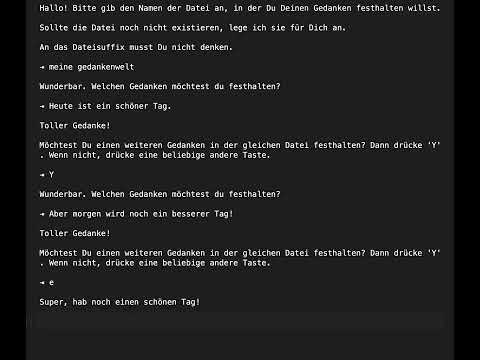

In [5]:
#Führ diese Zelle aus, um das Video einzubetten.
from IPython.display import YouTubeVideo
YouTubeVideo('RlshSCCX55E')

Ergänzend zu diesem Video siehst Du unten eine Liste an einfachen Schritten, die – korrekt implementiert – die Aufgabe lösen und das im Video gezeigte Endprodukt verwirklichen. Diese einzelnen Schritte entsprechen dem zweiten Punkt beim algorithmischen Denken (nach der initialen Problemanalyse und vor der konkreten Implementierung).

Überleg Dir für jeden einzelnen Schritt, wie Du ihn konkret implementieren kannst, d.&nbsp;h. welche Funktionen oder Methoden sowie Kontrollstrukturen Du dafür benötigst. Schreib zu jedem Punkt alle Techniken auf, mithilfe welcher Du den jeweiligen Punkt konkret in Code umsetzen kannst. Ignorier dabei erst einmal, wie und in welcher Reihenfolge Du die Schritte anschließend miteinander verbindest:

1. Die Benutzerin wird gegrüßt und ihr wird erklärt, welche Funktionen das Programm ihr bietet.
2. Die Benutzerin wird aufgefordert, anzugeben, in welchem Dokument sie ihre(n) Gedanke(n) festhalten will. Handelt es sich um ein noch nicht existierendes Dokument, so wird es für sie geschaffen. Existiert das Dokument bereits, so soll(en) ihr(e) Gedanke(n) an dessen Ende gehängt werden.
3. Die Benutzerin wird aufgefordert, ihren Gedanken einzugeben.
4. Der Gedanke wird in das gewählte Dokument geschrieben.
5. Die Benutzerin wird zur Entscheidung aufgefordert, ob sie einen weiteren Gedanken im selben Dokument festhalten oder das Programm verlassen will.
    1. Will die Benutzerin einen weiteren Gedanken festhalten, so soll das Programm zu Schritt 3 zurückspringen.
    2. Will die Benutzerin das Programm verlassen, so soll sie verabschiedet werden.

Du kannst nun wählen, ob Du von hier aus selbst weiter machen willst. Der nächste Arbeitsschritt besteht natürlich darin, die einzelnen Techniken *in der richtigen Reihenfolge* in Code zu implementieren. Verwend dafür die folgende Code-Zelle. Sollte Dir nicht zu allen fünf Schritten eine mögliche Technik einfallen, so findest Du nach der Code-Zelle mögliche Implementierungslösungen für jeden einzelnen Schritt.

In [6]:
# In diese Zelle kannst Du den Code zur Übung schreiben.






















Hier siehst Du, wie die einzelnen Schritte implementiert werden können.

1. Die Benutzerin wird gegrüßt und ihr wird erklärt, welche Funktionen das Programm ihr bietet. <br><br>
    - ```print("Gruß")``` bietet sich an, um die Benutzerin initial zu grüßen.
    - Alternativ könnte man den Gruß auch in den ```input```-*prompt* von Schritt 2 integrieren (```input("Gruß + prompt")```; so wurde das im Video umgesetzt), an der Benutzeroberfläche sind beide Alternativen gleichwertig.
    - Wie stellen wir sicher, dass der Gruß nur wirklich am Anfang angezeigt wird, und nicht noch einmal, wenn die Benutzerin einen weiteren Gedanken festhalten will (vgl. Schritt 5.A.)? Wir führen eine Variable ```first_time``` ein und setzen sie ganz am Anfang auf ```True``` (```first_time = True```); das ```print("Gruß")```-Statement bzw. das kombinierte ```input("Gruß + prompt")```-Statement führen wir nur aus, wenn ```first_time``` ```True``` ist (```if first_time == True```); nach dem ersten Durchlauf setzen wir ```first_time``` auf ```False``` (```first_time = False```), der Gruß wird somit nicht mehr ausgegeben.<br><br>
2. Die Benutzerin wird aufgefordert, anzugeben, in welchem Dokument sie ihre(n) Gedanke(n) festhalten will. Handelt es sich um ein noch nicht existierendes Dokument, so wird es für sie geschaffen. Existiert das Dokument bereits, so soll(en) ihr(e) Gedanke(n) an dessen Ende gehängt werden.
    - Den Namen des gewünschten Dokuments fragen wir über ```input(prompt)``` ab (ggf. mit dem Gruß davor, s.&nbsp;o.), das Resultat weisen wir einer Variablen namens ```file_name``` zu.
    - Wie unter 1. erwähnt, soll dieser ```input```-Befehl nur bedingt ausgeführt werden, nämlich nur, wenn ```first_time``` ```True``` ist (```if first_time == True```).
    - Das gewünschte Dokument öffnen wir in einem ```with```-Statement mittels ```open``` im *append*-Modus (```"a"```) und ```"encoding=utf-8"```. Der *append*-Modus schafft das gewünschte Dokument, sollte es noch nicht existieren. Wenn es bereits existiert, wird der neue Inhalt an das gewünschte Dokument angehängt. Wichtig: Als Pfad übergeben wir der ```open```-Funktion einen konkatenierten string bestehend aus dem Pfad zum Verzeichnis (das kannst Du selbst auswählen), dem ```file_name``` sowie dem Suffix ".txt". Das geöffnete Dokument weisen wir wie üblich einer Variablen zu: ```as write_file```.<br><br>
3. Die Benutzerin wird aufgefordert, ihren Gedanken einzugeben.
    - Dafür verwenden wir wieder die ```input```-Funktion und weisen das Resultat der Variablen ```thought``` zu. Es spielt keine Rolle, ob wir dies vor oder eingerückt unter dem ```with```-Statement (s.&nbsp;o.) tun.<br><br>
4. Der Gedanke wird in das gewählte Dokument geschrieben.
    - Eingerückt unter dem ```with```-Statement wenden wir die ```write```-Methode auf ```write_file``` an, in die Klammern setzen wir ```thought``` sowie einen finalen Zeilenumbruch. ```thought``` wird jetzt also auf eine eigene Zeile in ```write_file``` geschrieben. Durch das Verlassen der Einrückung des ```with```-Statements wird das Dokument mit der neuen Zeile gespeichert und geschlossen.<br><br>
5. Die Benutzerin wird zur Entscheidung aufgefordert, ob sie einen weiteren Gedanken im selben Dokument festhalten oder das Programm verlassen will.
    - Hier kommt noch einmal ```input``` zum Einsatz. Da die Benutzerin ihre Entscheidung nicht über eine binäre "Ja/Nein"-Taste mitteilen kann, empfiehlt es sich, sie zur Eingabe eines "Y" (oder sonst eines bestimmten Buchstaben) aufzufordern, sollte sie noch einen weiteren Gedanken festhalten wollen. Andernfalls soll sie irgendeine andere Eingabe tätigen. Ihre Eingabe weisen wir der Variablen ```repeat``` zu.
     - Spätestens an dieser Stelle fällt uns auf, dass wir den gesamten vorherigen Code in eine Schleife einbauen müssen. Nämlich in eine (potentielle) Endlosschleife, die nur dann abgebrochen wird, wenn sich die Benutzerin dazu entscheidet, *keinen* weiteren Gedanken festzuhalten (vgl. Schritt 5.B.). Dafür verwenden wir ```while True``` (vgl. Notebook "Kontrollstrukturen"), eine Schleife, die sich unendlich wiederholt, es sei denn, Python trifft auf ein ```break```-Statement.
     - Am Ende des Codeblocks innerhalb der ```while```-Schleife müssen wir also prüfen, ob ```repeat``` "Y" (oder einem anderen festgelegten Zeichen) entspricht und abhängig davon die Schleife abbrechen (```break```) oder nicht.<br><br>
    1. Will die Benutzerin einen weiteren Gedanken festhalten, so soll das Programm zu Schritt 3 zurückspringen.
        - In diesem Fall müssen wir nichts weiter machen, die Schleife läuft ja von allein weiter. Einzig wichtig ist, dass der Gruß sowie die Aufforderung nach dem Namen des gewünschten Dokuments (Schritt 1 und 2) nicht wiederholt werden, indem wir hier ```first_time = False``` setzen.
        <br><br>
    2. Will die Benutzerin das Programm verlassen, so soll sie verabschiedet werden.
        - Entspricht ```repeat``` nicht "Y" (```if repeat != "Y"```), dann verabschieden wir uns von der Benutzerin über eine ```print```-Ausgabe und brechen die Endlossschleife ab (```break```).
        
Solltest Du den Anwendungsfall nicht bereits gelöst haben, versuch es nun mithilfe all dieser Techniken in der Code-Zelle oben.

***

Damit sind wir in der Lage, unsere Python-Programme über User:innen-Input interaktiv zu gestalten. 😎

Abschließend schauen wir uns noch die vermutlich am häufigsten benutzte Funktion, nämlich ```print```, genauer an.

## Die ```print```-Funktion im Detail

```print``` gibt bekanntlich null, ein oder mehrere Objekte als string aus:

In [7]:
number = 5

print() #'print' ohne Argument gibt einfach eine leere Zeile aus
print("Hier wird ein Objekt ausgegeben.")
print("Hier werden zwei Objekte", "ausgegeben.")
print("Hier", "werden", number, "Objekte", "ausgegeben.")


Hier wird ein Objekt ausgegeben.
Hier werden zwei Objekte ausgegeben.
Hier werden 5 Objekte ausgegeben.


Am dritten und vierten Beispiel sehen wir, dass ```print``` die einzelnen Objekte mit einem Leerschlag dazwischen konkateniert. Verantwortlich dafür ist der ```sep```-Parameter, der standardmäßig einem Leerschlag entspricht, aber natürlich anders spezifiziert werden kann:

In [8]:
print("Leer", "schlag", sep="")
print(13, 10, 1988, sep=".", end=" / ") #Deutsche Schreibweise
print(10, 13, 1988, sep="-") #US-amerikanische Schreibweise

Leerschlag
13.10.1988 / 10-13-1988


Im zweiten Beispiel haben wir zudem einen ```end```-Parameter spezifiziert. Überleg Dir für einen Augenblick, was hier der Standardwert sein könnte.

Genau, ein Zeilenumbruch.

Der letzte optionale Parameter der ```print```-Funktion heißt ```file```. Statt das/die übergegebe(n) Argument(e) standardmäßig im Outputfeld auszugeben, können wir den Output in eine externe Datei *umleiten*. Wichtig dabei ist, dass die Datei geöffnet ist:

In [9]:
with open("../3_Dateien/Output/print_file.txt", "a", encoding="utf-8") as write_file:
    print("So können wir in eine externe Datei schreiben.", file=write_file)
    
    #Dabei besteht übrigens kein Unterschied zur oben kennengelernten 'write'-Methode
    #write_file.write("So können wir in eine externe Datei schreiben.")

Wenn Du diese Zelle mehrfach ausführst, schreibst Du jedes Mal eine weitere Zelle in die externe Datei. Dies liegt natürlich am *append*-Modus.

### f-strings

Im Zusammenhang mit ```print``` sind auch die sog. *f-strings* (abgekürzt für *formatted string literals*) zu erwähnen. Gleich wie ```print``` (für die Ausgabe) und die Zeichenketten-Konkatenation mithilfe von ```+``` (vgl. Notebook "Einführung") können wir f-strings dazu nutzen, beliebig viele Werte zu einem string zusammenzusetzen. Das sieht syntaktisch so aus:

In [10]:
letter = "f"
sentence = f"Ein f-string beginnt mit einem kleinen '{letter}' oder großen '{letter.upper()}'."
print(sentence)

Ein f-string beginnt mit einem kleinen 'f' oder großen 'F'.


Steht ein "f"/"F" vor dem öffnenden Anführungszeichen eines string, können wir beliebig viele Werte, jeweils umrahmt von geschweiften Klammern, *in* den string reinpacken. Der Wert kann dabei direkt von einer Variablen kommen (oben ```letter```) oder das Ergebnis eines komplexen Ausdrucks sein (oben bei ```letter.upper()```).  

Als Erinnerung (vom Notebook "Einführung"): Ein komplexer Ausdruck wie eine arithmetische Operation (```2*3```), eine Funktion (```sorted``` oder ```len```), eine Methode (s.&nbsp;o.), ein Werteabruf in einem dictionary (```dictionary[key]```) etc. gibt immer *einen* Wert zurück (```6``` beim Beispiel für die arithmetische Operation). Genau dieser Wert wird dann an der Stelle der geschweiften Klammern im string eingesetzt.

Derselben Logik entsprechend lassen sich auch bedingte Anweisungen in einen f-string integrieren. Folgenden Code kennen wir bereits von oben. Dank f-strings ist er nun aber wesentlich kürzer:

In [11]:
name = input("Wie heißt Du?")
age = int(input("Und wie alt bist Du?"))

print(f"Freut mich, {name}. Du darfst {'leider nicht' if age < 18 else 'natürlich'} in den Club.")

StdinNotImplementedError: raw_input was called, but this frontend does not support input requests.

Spannender als das Einbauen von Werten in strings sind aber die durch f-strings entstehenden, unzähligen Möglichkeiten, diese Werte zu *formatieren*. Im Folgenden wollen wir uns auf die zwei wichtigsten Formatiermöglichkeiten konzentrieren. Weitere findest Du im Cheat Sheet zu f-strings.

1. Nachkommastellen: Besonders praktisch ist die Möglichkeit, die Anzahl an Nachkommastellen bei Dezimalzahlen festzulegen:

In [12]:
value = 23.238457584

#Hier runden wir 'value' auf zwei Nachkommastellen
print(f"Zahl mit nur zwei Nachkommastellen: {value:.2f}") 

Zahl mit nur zwei Nachkommastellen: 23.24


Egal wie ein Wert formatiert werden soll, die Formatierung wird durch einen Doppelpunkt nach dem Wert eingeleitet. 

Danach wird spezifiziert, wie der Wert formatiert werden soll: ```.2``` definiert im Beispiel oben, dass ```value``` auf zwei Nachkommastellen gekürzt werden soll, das ```f``` definiert, als welcher Datentyp der formatierte Wert ausgegeben werden soll (hier als Dezimalzahl, wobei das *f* von der englischen Bezeichnung *float* herrührt).

2. Ausrichten von Zahlen: Ebenso praktisch ist es, mehrere Zahlen, die aus einer unterschiedlichen Anzahl an Ziffern bestehen, einheitlich untereinander auszurichten:

In [13]:
value1 = 1
value2 = 123
print(f"Schön ausgerichtete Zahl: {value1:3} (ohne 'Auffüllung')")
print(f"Schön ausgerichtete Zahl: {value1:03} (mit Nullen 'aufgefüllt')")
print(f"Schön ausgerichtete Zahl: {value2:3} (keine 'Auffüllung', da dreiziffrig)")

Schön ausgerichtete Zahl:   1 (ohne 'Auffüllung')
Schön ausgerichtete Zahl: 001 (mit Nullen 'aufgefüllt')
Schön ausgerichtete Zahl: 123 (keine 'Auffüllung', da dreiziffrig)


Hier definieren wir nach dem Doppelpunkt einen sog. *digit space*, also die Anzahl an Stellen, die zur Ausgabe verwendet werden soll. In den Beispielen oben wird der digit space als aus drei Stellen bestehend definiert. Optional können wir davor angeben, ob etwaige leere Stellen (da die Zahl aus weniger Ziffern als Stellen des digit space besteht) mit Nullen "aufgefüllt" werden sollen (engl.: *zero padding*). Zahlen, die aus weniger Ziffern als der digit space bestehen und nicht zero-gepaddet werden, werden rechtsbündig ausgegeben. Wie Du diese Ausrichtung innerhalb des vorgegebenen digit space ändern kannst (engl.: *alignment*), findest Du im Cheat Sheet.

Digit space und Nachkommastellen können natürlich auch zusammen definiert werden, die syntaktische Reihenfolge sieht dann so aus (die Leerschläge dienen nur der besseren Lesbarkeit und müssen im Code entfernt werden!):

```f"{value: (zero_padding) digit_space . decimals type}```

Genau diese Kombination aus digit space und Nachkommastellen kannst Du nun in der letzten Übung einsetzen.

***

✏️ **Übung 2:** In ```shopping_list``` finden sich Schlüssel-Werte-Paare bestehend aus Lebensmitteln und dem jeweiligen Preis. Deine Aufgabe ist es, die Ausgabe mithilfe von f-strings wie im folgenden Screenshot gezeigt auszugeben.

<img src="../3_Dateien/Grafiken_und_Videos/Einkaufskorb.png">

Hinweis 1: Einen digit space kannst Du nicht nur für Zahlen, sondern für Objekte jeglichen Datentyps festlegen. Der digit space für die Spalte "Product" soll 25 Stellen betragen, derjenige für "Price" fünf.

Hinweis 2: Wie erwähnt werden Zahlen innerhalb des digit space standardmäßig rechtsbündig ausgerichtet. Strings werden hingegen innerhalb des digit space standardmäßig linksbündig ausgerichtet (Tabellenkalkulationsprogramme legen das gleiche Verhalten an den Tag, wie Dir vielleicht schon aufgefallen ist). Um die Darstellung im Screenshot umzusetzen, musst Du Dich folglich nicht um das Alignment kümmern, da es dem Standard entspricht.

In [14]:
#In diese Zelle kannst Du den Code zur Übung schreiben.

shopping_list = {"Apple": 0.77, "Banana": 1.23, "Oat Milk": 1.944, "Olive Oil Extra Vergine": 11.17}




***

Damit wissen wir alles Wichtige rund um In- und Output von Daten. Gute Arbeit!